In [1]:
import sys
import os
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.stats import pearsonr, spearmanr

/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
import base64
import io

def plt2base64(plt):
    pic_IObytes = io.BytesIO()
    plt.savefig(pic_IObytes,  format='png')
    pic_IObytes.seek(0)
    pic_hash = base64.b64encode(pic_IObytes.read())
    return bytes.decode(pic_hash) # convert bytes to string

def plt2html(plt):
    '''
    output an HTML img tag
    '''
    return '<img src="data:image/.png;base64,' + plt2base64(plt) + '">'

In [3]:
import matplotlib.pyplot as plt

def visualize_matrix(dm, cmap = None, silent = False):

    fig = plt.figure(figsize = (3,3))
    if cmap is None:
        plt.imshow(dm)
    else:
        plt.imshow(dm, cmap = cmap)

    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_visible(False)
    cur_axes.axes.get_yaxis().set_visible(False) 

    fig.tight_layout()
        
    s = plt2html(plt) # must appear before plt.show()

    if (silent == False):
        plt.show()
    return s

In [4]:
Big_data_set = pd.read_csv('r\home\bonsai\wholecell3\cvhighdataset.csv')
Big_data_set

,FDNG-MONOMER[p],E1O[c],FORMATEDEHYDROGN-CPLX[i],MONOMER0-5[i],YBBP-MONOMER[i],XANTHOSINEPHOSPHORY-CPLX[c],G6529-MONOMER[i],CPLX0-7697[c],PHOR-CPLX[c],PHOSPHO-PHOB[c],...,EG10686-MONOMER[i],EG12391-MONOMER[c],GUANYL-KIN-MONOMER[c],G7694-MONOMER[m],EG11134-MONOMER[c],EG11426-MONOMER[c],EG11768-MONOMER[c],G7452-MONOMER[c],CREC-MONOMER[i],EG10564-MONOMER[c]
0,0,0,0,0,0,0,8,0,0,0,...,1,1,2,32,2,20,38,3,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,2,1,25,5,20,36,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,28,1,41,58,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,30,1,19,41,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,107,3,59,19,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,0,0,0,0,0,0,0,0,0,0,...,1,1,1,204,3,18,28,1,0,1
2066,0,0,0,0,0,0,0,0,0,0,...,0,2,1,28,1,34,32,3,0,1
2067,0,0,0,0,0,0,0,0,0,0,...,1,0,0,24,1,33,60,1,1,0
2068,0,0,0,0,0,0,0,0,0,0,...,1,1,2,22,1,22,27,1,1,1


In [5]:
Big_data_set = Big_data_set.iloc[:, : 1752]
Big_data_set

,FDNG-MONOMER[p],E1O[c],FORMATEDEHYDROGN-CPLX[i],MONOMER0-5[i],YBBP-MONOMER[i],XANTHOSINEPHOSPHORY-CPLX[c],G6529-MONOMER[i],CPLX0-7697[c],PHOR-CPLX[c],PHOSPHO-PHOB[c],...,G6116-MONOMER[c],EG11249-MONOMER[c],CPLX0-7958[i],PHOSPHO-ARCA[c],G7531-MONOMER[c],G6662-MONOMER[c],ARAH-MONOMER[i],EG11692-MONOMER[c],G6112-MONOMER[c],LIPIDADISACCHARIDESYNTH-MONOMER[i]
0,0,0,0,0,0,0,8,0,0,0,...,37,0,2,11,0,0,113,0,39,1
1,0,0,0,0,0,0,0,0,0,0,...,39,0,1,14,1,0,93,0,39,1
2,0,0,0,0,0,0,0,0,0,0,...,176,0,1,13,0,1,55,1,41,0
3,0,0,0,0,0,0,0,0,0,0,...,64,0,1,11,0,0,29,1,36,0
4,0,0,0,0,0,0,0,0,0,0,...,28,0,0,1,1,1,30,0,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,0,0,0,0,0,0,0,0,0,0,...,40,0,0,0,1,0,65,0,287,1
2066,0,0,0,0,0,0,0,0,0,0,...,61,1,2,11,0,1,32,0,39,0
2067,0,0,0,0,0,0,0,0,0,0,...,31,1,1,11,0,0,123,2,45,1
2068,0,0,0,0,0,0,0,0,0,0,...,46,1,0,11,1,0,23,0,78,1


In [6]:
from sklearn.preprocessing import StandardScaler
standardised_data = StandardScaler().fit_transform(Big_data_set)
standardised_data

array([[-2.19846601e-02, -2.19846601e-02, -2.19846601e-02, ...,
        -9.99898302e-01, -5.01306136e-01,  9.84717570e-01],
       [-2.19846601e-02, -2.19846601e-02, -2.19846601e-02, ...,
        -9.99898302e-01, -5.01306136e-01,  9.84717570e-01],
       [-2.19846601e-02, -2.19846601e-02, -2.19846601e-02, ...,
         8.59750831e-01, -4.75731184e-01, -1.00005884e+00],
       ...,
       [-2.19846601e-02, -2.19846601e-02, -2.19846601e-02, ...,
         2.71939996e+00, -4.24581278e-01,  9.84717570e-01],
       [-2.19846601e-02, -2.19846601e-02, -2.19846601e-02, ...,
        -9.99898302e-01, -2.59456041e-03,  9.84717570e-01],
       [-2.19846601e-02, -2.19846601e-02, -2.19846601e-02, ...,
        -9.99898302e-01, -3.73431373e-01,  9.84717570e-01]])

### Quality metrics in 2D

In [7]:
from sklearn.decomposition import PCA, FastICA
from sklearn import manifold
import matplotlib.ticker as mticker
import umap
from sklearn.manifold import TSNE
from sklearn.manifold import SpectralEmbedding

import time

start = time.perf_counter()
# Generate PCA embedding
K = 2
pca = PCA(n_components = K) # keep the first K components
pca.fit(standardised_data)
pca_embedding = pd.DataFrame(pca.transform(standardised_data))

end = time.perf_counter()
print(f"Processed the PCA algorithm in {start-end:0.4f} seconds")

print(pca_embedding)

Processed the PCA algorithm in -0.6048 seconds
              0         1
0      3.926825  0.963252
1    -13.379599  8.719533
2     -2.025434 -2.569663
3      5.398819 -0.731934
4     -3.926733  5.397439
...         ...       ...
2065  -0.789125 -0.329441
2066   2.068767 -2.974765
2067   0.240664  2.455152
2068  -0.299751  2.684201
2069  -1.599189 -6.703848

[2070 rows x 2 columns]


In [8]:
import time

import coranking
from coranking.metrics import trustworthiness, continuity, LCMC

Q1 = coranking.coranking_matrix(standardised_data, pca_embedding)
trust_pca = trustworthiness(Q1, min_k=1, max_k=500)
cont_pca = continuity(Q1, min_k=1, max_k=500)
lcmc_pca = LCMC(Q1, min_k=1, max_k=500)

end = time.perf_counter()

In [57]:
end

117070.273299077

Text(0.5, 0, 'Neighbours')

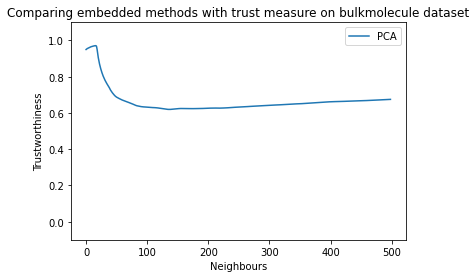

In [10]:
plt.plot(trust_pca, label = 'PCA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with trust measure on bulkmolecule dataset')
plt.ylabel('Trustworthiness')
plt.xlabel('Neighbours')

Text(0.5, 0, 'Neighbours')

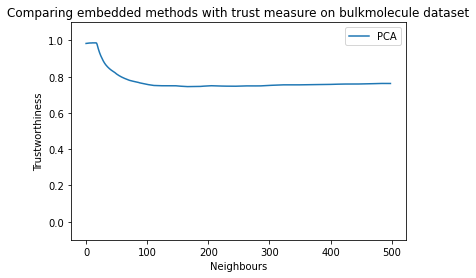

In [11]:
plt.plot(cont_pca, label = 'PCA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with trust measure on bulkmolecule dataset')
plt.ylabel('Trustworthiness')
plt.xlabel('Neighbours')

Text(0.5, 0, 'Neighbours')

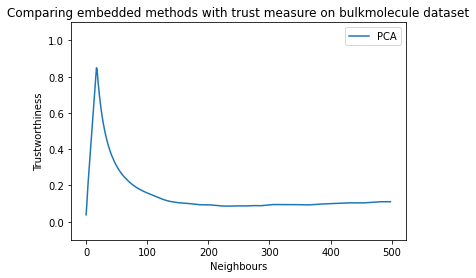

In [12]:
plt.plot(lcmc_pca, label = 'PCA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with trust measure on bulkmolecule dataset')
plt.ylabel('Trustworthiness')
plt.xlabel('Neighbours')

In [13]:
AUC_T1 = np.mean(trust_pca)
AUC_C1 = np.mean(cont_pca)

print("AUC of PCA Trust = ", AUC_T1)
print("AUC of PCA Cont = ", AUC_C1)

AUC of PCA Trust =  0.6653043863623274
AUC of PCA Cont =  0.7722355133285503


In [14]:
m = len(Q1)
QNN1 = np.zeros(m)
for k in range(m):    
        QNN1[k] = np.sum(Q1[:k+1,:k+1])/((k+1) * m)
        
Plot_QNN1 = QNN1[range(1,101)]

In [15]:
AUC1 = np.mean(QNN1)

print("AUC of PCA is", AUC1)

AUC of PCA is 0.6180062828099893


In [16]:
kmax1 = np.argmax(lcmc_pca)

print("kmax of pca is", kmax1)

kmax of pca is 17


In [17]:
Qlocal1 = np.sum(QNN1[:kmax1+1])/(kmax1 + 1) 
Qglobal1 = np.sum(QNN1[kmax1:-1])/(m - kmax1 -1)

print("Qlocal of PCA =", Qlocal1)
print("Qglobal of PCA =", Qglobal1)

Qlocal of PCA = 0.4597256436097072
Qglobal of PCA = 0.6193261160114066


### Quality metrics in 2D - tsne

In [18]:
from sklearn.decomposition import PCA, FastICA
from sklearn import manifold
import matplotlib.ticker as mticker
import umap
from sklearn.manifold import SpectralEmbedding

import time

start = time.perf_counter()
# Generate t-sne embedding
tsne_embedding1 = TSNE(n_components=2, perplexity=5.0, n_iter=1000, verbose=1, method = 'barnes_hut',random_state=0).fit_transform(standardised_data)
end = time.perf_counter()
print(f"Processed the t-SNE algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate t-sne embedding
tsne_embedding2 = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1, method = 'barnes_hut',random_state=0).fit_transform(standardised_data)
end = time.perf_counter()
print(f"Processed the t-SNE algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate t-sne embedding
tsne_embedding3 = TSNE(n_components=2, perplexity=100.0, n_iter=1000, verbose=1, method = 'barnes_hut',random_state=0).fit_transform(standardised_data)
end = time.perf_counter()
print(f"Processed the t-SNE algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate t-sne embedding
tsne_embedding4 = TSNE(n_components=2, perplexity=500.0, n_iter=1000, verbose=1, method = 'barnes_hut',random_state=0).fit_transform(standardised_data)
end = time.perf_counter()
print(f"Processed the t-SNE algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate t-sne embedding
tsne_embedding5 = TSNE(n_components=2, perplexity=1000.0, n_iter=1000, verbose=1, method = 'barnes_hut',random_state=0).fit_transform(standardised_data)
end = time.perf_counter()
print(f"Processed the t-SNE algorithm in {start-end:0.4f} seconds")

/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2070 samples in 0.002s...
[t-SNE] Computed neighbors for 2070 samples in 0.327s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2070
[t-SNE] Computed conditional probabilities for sample 2000 / 2070
[t-SNE] Computed conditional probabilities for sample 2070 / 2070
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.779747
[t-SNE] KL divergence after 1000 iterations: 0.306662
Processed the t-SNE algorithm in -100.6240 seconds
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2070 samples in 0.007s...


/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 2070 samples in 0.276s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2070
[t-SNE] Computed conditional probabilities for sample 2000 / 2070
[t-SNE] Computed conditional probabilities for sample 2070 / 2070
[t-SNE] Mean sigma: 25.619016
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.393173
[t-SNE] KL divergence after 1000 iterations: 0.231684
Processed the t-SNE algorithm in -95.3026 seconds
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 2070 samples in 0.002s...


/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 2070 samples in 0.230s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2070
[t-SNE] Computed conditional probabilities for sample 2000 / 2070
[t-SNE] Computed conditional probabilities for sample 2070 / 2070
[t-SNE] Mean sigma: 27.427186
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.464760
[t-SNE] KL divergence after 1000 iterations: -0.212142
Processed the t-SNE algorithm in -101.0610 seconds
[t-SNE] Computing 1501 nearest neighbors...
[t-SNE] Indexed 2070 samples in 0.002s...


/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 2070 samples in 0.411s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2070
[t-SNE] Computed conditional probabilities for sample 2000 / 2070
[t-SNE] Computed conditional probabilities for sample 2070 / 2070
[t-SNE] Mean sigma: 26.552744
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.680225
[t-SNE] KL divergence after 1000 iterations: 0.356943
Processed the t-SNE algorithm in -121.4914 seconds
[t-SNE] Computing 2069 nearest neighbors...
[t-SNE] Indexed 2070 samples in 0.002s...


/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 2070 samples in 0.546s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2070
[t-SNE] Computed conditional probabilities for sample 2000 / 2070
[t-SNE] Computed conditional probabilities for sample 2070 / 2070
[t-SNE] Mean sigma: 28.364415
[t-SNE] KL divergence after 250 iterations with early exaggeration: 38.239189
[t-SNE] KL divergence after 1000 iterations: -0.034734
Processed the t-SNE algorithm in -123.1137 seconds


In [19]:
import coranking
from coranking.metrics import trustworthiness, continuity, LCMC

Q1 = coranking.coranking_matrix(standardised_data, tsne_embedding1)
trust_isomap = trustworthiness(Q1, min_k=1, max_k=500)
cont_isomap = continuity(Q1, min_k=1, max_k=500)
lcmc_isomap = LCMC(Q1, min_k=1, max_k=500)

Q2 = coranking.coranking_matrix(standardised_data, tsne_embedding2)
trust_pca = trustworthiness(Q2, min_k=1, max_k=500)
cont_pca = continuity(Q2, min_k=1, max_k=500)
lcmc_pca = LCMC(Q2, min_k=1, max_k=500)

Q3 = coranking.coranking_matrix(standardised_data, tsne_embedding3)
trust_UMAP = trustworthiness(Q3, min_k=1, max_k=500)
cont_UMAP = continuity(Q3, min_k=1, max_k=500)
lcmc_UMAP = LCMC(Q3, min_k=1, max_k=500)

Q5 = coranking.coranking_matrix(standardised_data, tsne_embedding4)
trust_ica = trustworthiness(Q5, min_k=1, max_k=500)
cont_ica = continuity(Q5, min_k=1, max_k=500)
lcmc_ica = LCMC(Q5, min_k=1, max_k=500)

Q6 = coranking.coranking_matrix(standardised_data, tsne_embedding5)
trust_spec = trustworthiness(Q6, min_k=1, max_k=500)
cont_spec = continuity(Q6, min_k=1, max_k=500)
lcmc_spec = LCMC(Q6, min_k=1, max_k=500)

Text(0.5, 0, 'Neighbours')

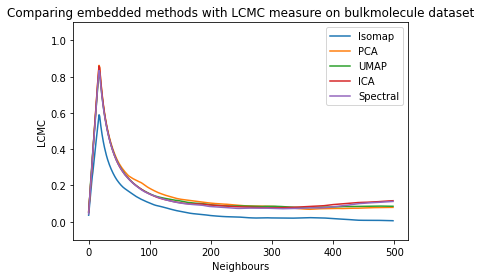

In [20]:
plt.plot(lcmc_isomap, label = 'Isomap')
plt.plot(lcmc_pca, label = 'PCA')
plt.plot(lcmc_UMAP, label = 'UMAP')
plt.plot(lcmc_ica, label = 'ICA')
plt.plot(lcmc_spec, label = 'Spectral')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with LCMC measure on bulkmolecule dataset')
plt.ylabel('LCMC')
plt.xlabel('Neighbours')

Text(0.5, 0, 'Neighbours')

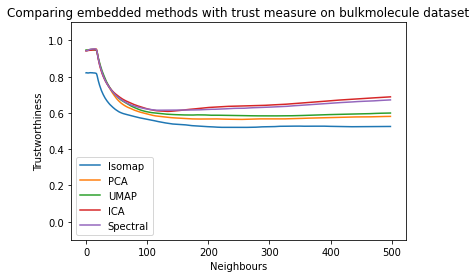

In [21]:
plt.plot(trust_isomap, label = 'Isomap')
plt.plot(trust_pca, label = 'PCA')
plt.plot(trust_UMAP, label = 'UMAP')
plt.plot(trust_ica, label = 'ICA')
plt.plot(trust_spec, label = 'Spectral')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with trust measure on bulkmolecule dataset')
plt.ylabel('Trustworthiness')
plt.xlabel('Neighbours')

Text(0.5, 0, 'Neighbours')

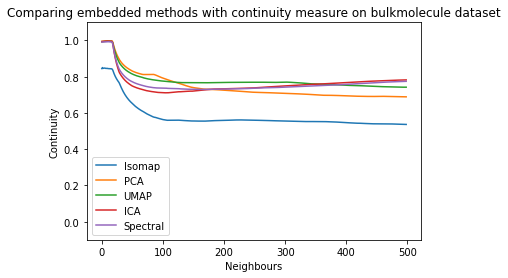

In [22]:
plt.plot(cont_isomap, label = 'Isomap')
plt.plot(cont_pca, label = 'PCA')
plt.plot(cont_UMAP, label = 'UMAP')
plt.plot(cont_ica, label = 'ICA')
plt.plot(cont_spec, label = 'Spectral')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with continuity measure on bulkmolecule dataset')
plt.ylabel('Continuity')
plt.xlabel('Neighbours')

In [23]:
AUC_T1 = np.mean(trust_isomap)
AUC_C1 = np.mean(cont_isomap)
AUC_T2 = np.mean(trust_pca)
AUC_C2 = np.mean(cont_pca)
AUC_T3 = np.mean(trust_UMAP)
AUC_C3 = np.mean(cont_UMAP)
AUC_T5 = np.mean(trust_ica)
AUC_C5 = np.mean(cont_ica)
AUC_T6 = np.mean(trust_spec)
AUC_C6 = np.mean(cont_spec)



print("AUC of isomap Trust = ", AUC_T1)
print("AUC of isomap Cont = ", AUC_C1)
print("AUC of PCA Trust = ", AUC_T2)
print("AUC of PCA Cont = ", AUC_C2)
print("AUC of UMAP Trust = ", AUC_T3)
print("AUC of UMAP Cont = ", AUC_C3)
print("AUC of ICA Trust = ", AUC_T5)
print("AUC of ICA Cont = ", AUC_C5)
print("AUC of Spectral Embedding Trust = ", AUC_T6)
print("AUC of Spectral Embedding Cont = ", AUC_C6)

AUC of isomap Trust =  0.5544447239847937
AUC of isomap Cont =  0.579279279618272
AUC of PCA Trust =  0.6045330020561205
AUC of PCA Cont =  0.7451936791139583
AUC of UMAP Trust =  0.6206344284212082
AUC of UMAP Cont =  0.7797741699035946
AUC of ICA Trust =  0.6671112084902886
AUC of ICA Cont =  0.7599924336568026
AUC of Spectral Embedding Trust =  0.6586134014287331
AUC of Spectral Embedding Cont =  0.7610791266724766


In [24]:
m = len(Q1)
QNN1 = np.zeros(m)
for k in range(m):    
        QNN1[k] = np.sum(Q1[:k+1,:k+1])/((k+1) * m)
        
Plot_QNN1 = QNN1[range(1,101)]

m = len(Q2)
QNN2 = np.zeros(m)
for k in range(m):    
        QNN2[k] = np.sum(Q2[:k+1,:k+1])/((k+1) * m)
       
Plot_QNN2 = QNN2[range(1,101)]

m = len(Q3)
QNN3 = np.zeros(m)
for k in range(m):    
        QNN3[k] = np.sum(Q3[:k+1,:k+1])/((k+1) * m)
       
Plot_QNN3 = QNN3[range(1,101)]

m = len(Q5)
QNN5 = np.zeros(m)
for k in range(m):    
        QNN5[k] = np.sum(Q5[:k+1,:k+1])/((k+1) * m)
       
Plot_QNN5 = QNN5[range(1,101)]

m = len(Q6)
QNN6 = np.zeros(m)
for k in range(m):    
        QNN6[k] = np.sum(Q6[:k+1,:k+1])/((k+1) * m)
       
Plot_QNN6 = QNN6[range(1,101)]

Text(0.5, 0, 'Neighbours')

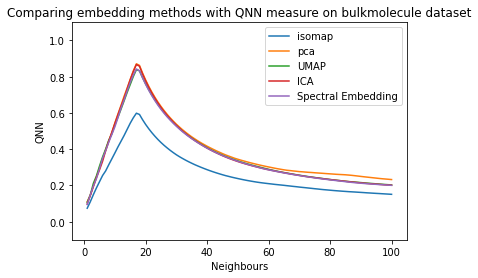

In [25]:
plt.plot(list(range(1, len(Plot_QNN1)+1)), Plot_QNN1, label = 'isomap')
plt.plot(list(range(1, len(Plot_QNN2)+1)), Plot_QNN2, label = 'pca')
plt.plot(list(range(1, len(Plot_QNN3)+1)), Plot_QNN3, label = 'UMAP')
plt.plot(list(range(1, len(Plot_QNN5)+1)), Plot_QNN5, label = 'ICA')
plt.plot(list(range(1, len(Plot_QNN6)+1)), Plot_QNN6, label = 'Spectral Embedding')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedding methods with QNN measure on bulkmolecule dataset')
plt.ylabel('QNN')
plt.xlabel('Neighbours')

In [26]:
AUC1 = np.mean(QNN1)
AUC2 = np.mean(QNN2)
AUC3 = np.mean(QNN3)
AUC5 = np.mean(QNN5)
AUC6 = np.mean(QNN6)

print("AUC of isomap is", AUC1)
print("AUC of pca is", AUC2)
print("AUC of UMAP is", AUC3)
print("AUC of ICA is", AUC5)
print("AUC of Spectral Embedding is", AUC6)

AUC of isomap is 0.5010138317997882
AUC of pca is 0.5530660311774306
AUC of UMAP is 0.5706047112354983
AUC of ICA is 0.6217522247637167
AUC of Spectral Embedding is 0.6097207359668078


In [27]:
kmax1 = np.argmax(lcmc_isomap)
kmax2 = np.argmax(lcmc_pca)
kmax3 = np.argmax(lcmc_UMAP)
kmax5 = np.argmax(lcmc_ica)
kmax6 = np.argmax(lcmc_spec)

print("kmax of isomap is", kmax1)
print("kmax of pca is", kmax2)
print("kmax of UMAP is", kmax3)
print("kmax of ICA is", kmax5)
print("kmax of Spectral Embedding is", kmax6)

kmax of isomap is 17
kmax of pca is 17
kmax of UMAP is 17
kmax of ICA is 17
kmax of Spectral Embedding is 17


In [28]:
Qlocal1 = np.sum(QNN1[:kmax1+1])/(kmax1 + 1) 
Qglobal1 = np.sum(QNN1[kmax1:-1])/(m - kmax1 -1)

Qlocal2 = np.sum(QNN2[:kmax2+1])/(kmax2 + 1) 
Qglobal2 = np.sum(QNN2[kmax2:-1])/(m - kmax2 -1)

Qlocal3 = np.sum(QNN3[:kmax3+1])/(kmax3 + 1) 
Qglobal3 = np.sum(QNN3[kmax3:-1])/(m - kmax3 -1)

Qlocal5 = np.sum(QNN5[:kmax5+1])/(kmax5 + 1) 
Qglobal5 = np.sum(QNN5[kmax5:-1])/(m - kmax5 -1)

Qlocal6 = np.sum(QNN6[:kmax6+1])/(kmax6 + 1) 
Qglobal6 = np.sum(QNN6[kmax6:-1])/(m - kmax6 -1)

print("Qlocal of isomap =", Qlocal1)
print("Qglobal of isomap =", Qglobal1)

print("Qlocal of pca =", Qlocal2)
print("Qglobal of pca =", Qglobal2)

print("Qlocal of UMAP =", Qlocal3)
print("Qglobal of UMAP =", Qglobal3)

print("Qlocal of ICA =", Qlocal5)
print("Qglobal of ICA =", Qglobal5)

print("Qlocal of Spectral Embedding =", Qlocal6)
print("Qglobal of Spectral Embedding =", Qglobal6)

Qlocal of isomap = 0.32819983616042847
Qglobal of isomap = 0.5023347839688722
Qlocal of pca = 0.46850940209962044
Qglobal of pca = 0.5537453913326786
Qlocal of UMAP = 0.45975354973284255
Qglobal of UMAP = 0.5714989687145663
Qlocal of ICA = 0.4635287701045408
Qglobal of ICA = 0.6230761133218397
Qlocal of Spectral Embedding = 0.4560760884366112
Qglobal of Spectral Embedding = 0.6109924456594263


### Quality metrics in 2D - UMAP

In [29]:
from sklearn.decomposition import PCA, FastICA
from sklearn import manifold
import matplotlib.ticker as mticker
import umap
from sklearn.manifold import SpectralEmbedding

import time

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=30,min_dist=0,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding1 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=30,min_dist=0.01,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding2 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=30,min_dist=0.05,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding3 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=30,min_dist=0.1,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding4 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=30,min_dist=0.5,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding5 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=30,min_dist=1,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding6 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=50,min_dist=0,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding7 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=50,min_dist=0.01,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding8 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=50,min_dist=0.05,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding9 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=50,min_dist=0.1,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding10 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=50,min_dist=0.5,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding11 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=50,min_dist=1,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding12 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=100,min_dist=0,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding13 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=100,min_dist=0.01,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding14 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=100,min_dist=0.05,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding15 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=100,min_dist=0.1,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding16 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=100,min_dist=0.5,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding17 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=100,min_dist=1,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding18 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")



Processed the UMAP algorithm in -33.5533 seconds
Processed the UMAP algorithm in -23.3306 seconds
Processed the UMAP algorithm in -23.4590 seconds
Processed the UMAP algorithm in -23.8137 seconds
Processed the UMAP algorithm in -23.6543 seconds
Processed the UMAP algorithm in -23.6462 seconds
Processed the UMAP algorithm in -23.7610 seconds
Processed the UMAP algorithm in -24.1747 seconds
Processed the UMAP algorithm in -23.8256 seconds
Processed the UMAP algorithm in -23.9746 seconds
Processed the UMAP algorithm in -23.8679 seconds
Processed the UMAP algorithm in -23.6800 seconds
Processed the UMAP algorithm in -24.0499 seconds
Processed the UMAP algorithm in -24.2491 seconds
Processed the UMAP algorithm in -24.5293 seconds
Processed the UMAP algorithm in -24.2332 seconds
Processed the UMAP algorithm in -25.1594 seconds
Processed the UMAP algorithm in -24.6130 seconds


In [30]:
import coranking
from coranking.metrics import trustworthiness, continuity, LCMC

Q1 = coranking.coranking_matrix(standardised_data, UMAP_embedding1)
trust_isomap = trustworthiness(Q1, min_k=1, max_k=500)
cont_isomap = continuity(Q1, min_k=1, max_k=500)
lcmc_isomap = LCMC(Q1, min_k=1, max_k=500)

Q2 = coranking.coranking_matrix(standardised_data, UMAP_embedding2)
trust_pca = trustworthiness(Q2, min_k=1, max_k=500)
cont_pca = continuity(Q2, min_k=1, max_k=500)
lcmc_pca = LCMC(Q2, min_k=1, max_k=500)

Q3 = coranking.coranking_matrix(standardised_data, UMAP_embedding3)
trust_UMAP = trustworthiness(Q3, min_k=1, max_k=500)
cont_UMAP = continuity(Q3, min_k=1, max_k=500)
lcmc_UMAP = LCMC(Q3, min_k=1, max_k=500)

Q4 = coranking.coranking_matrix(standardised_data, UMAP_embedding4)
trust_ica = trustworthiness(Q4, min_k=1, max_k=500)
cont_ica = continuity(Q4, min_k=1, max_k=500)
lcmc_ica = LCMC(Q4, min_k=1, max_k=500)

Q5 = coranking.coranking_matrix(standardised_data, UMAP_embedding5)
trust_spec = trustworthiness(Q5, min_k=1, max_k=500)
cont_spec = continuity(Q5, min_k=1, max_k=500)
lcmc_spec = LCMC(Q5, min_k=1, max_k=500)


Q6 = coranking.coranking_matrix(standardised_data, UMAP_embedding6)
trust_isomap2 = trustworthiness(Q6, min_k=1, max_k=500)
cont_isomap2 = continuity(Q6, min_k=1, max_k=500)
lcmc_isomap2 = LCMC(Q6, min_k=1, max_k=500)

Q7 = coranking.coranking_matrix(standardised_data, UMAP_embedding7)
trust_pca2 = trustworthiness(Q7, min_k=1, max_k=500)
cont_pca2 = continuity(Q7, min_k=1, max_k=500)
lcmc_pca2 = LCMC(Q7, min_k=1, max_k=500)

Q8 = coranking.coranking_matrix(standardised_data, UMAP_embedding8)
trust_UMAP2 = trustworthiness(Q8, min_k=1, max_k=500)
cont_UMAP2 = continuity(Q8, min_k=1, max_k=500)
lcmc_UMAP2 = LCMC(Q8, min_k=1, max_k=500)

Q9 = coranking.coranking_matrix(standardised_data, UMAP_embedding9)
trust_ica2 = trustworthiness(Q9, min_k=1, max_k=500)
cont_ica2 = continuity(Q9, min_k=1, max_k=500)
lcmc_ica2 = LCMC(Q9, min_k=1, max_k=500)

Q10 = coranking.coranking_matrix(standardised_data, UMAP_embedding10)
trust_spec2 = trustworthiness(Q10, min_k=1, max_k=500)
cont_spec2 = continuity(Q10, min_k=1, max_k=500)
lcmc_spec2 = LCMC(Q10, min_k=1, max_k=500)


Q11 = coranking.coranking_matrix(standardised_data, UMAP_embedding11)
trust_isomap3 = trustworthiness(Q11, min_k=1, max_k=500)
cont_isomap3 = continuity(Q11, min_k=1, max_k=500)
lcmc_isomap3 = LCMC(Q11, min_k=1, max_k=500)

Q12 = coranking.coranking_matrix(standardised_data, UMAP_embedding12)
trust_pca3 = trustworthiness(Q12, min_k=1, max_k=500)
cont_pca3 = continuity(Q12, min_k=1, max_k=500)
lcmc_pca3 = LCMC(Q12, min_k=1, max_k=500)

Q13 = coranking.coranking_matrix(standardised_data, UMAP_embedding13)
trust_UMAP3 = trustworthiness(Q13, min_k=1, max_k=500)
cont_UMAP3 = continuity(Q13, min_k=1, max_k=500)
lcmc_UMAP3 = LCMC(Q13, min_k=1, max_k=500)

Q14 = coranking.coranking_matrix(standardised_data, UMAP_embedding14)
trust_ica3 = trustworthiness(Q14, min_k=1, max_k=500)
cont_ica3 = continuity(Q14, min_k=1, max_k=500)
lcmc_ica3 = LCMC(Q14, min_k=1, max_k=500)

Q15 = coranking.coranking_matrix(standardised_data, UMAP_embedding15)
trust_spec3 = trustworthiness(Q15, min_k=1, max_k=500)
cont_spec3 = continuity(Q15, min_k=1, max_k=500)
lcmc_spec3 = LCMC(Q15, min_k=1, max_k=500)


Q16 = coranking.coranking_matrix(standardised_data, UMAP_embedding16)
trust_isomap4 = trustworthiness(Q16, min_k=1, max_k=500)
cont_isomap4 = continuity(Q16, min_k=1, max_k=500)
lcmc_isomap4 = LCMC(Q16, min_k=1, max_k=500)

Q17 = coranking.coranking_matrix(standardised_data, UMAP_embedding17)
trust_pca4 = trustworthiness(Q17, min_k=1, max_k=500)
cont_pca4 = continuity(Q17, min_k=1, max_k=500)
lcmc_pca4 = LCMC(Q17, min_k=1, max_k=500)

Q18 = coranking.coranking_matrix(standardised_data, UMAP_embedding18)
trust_UMAP4 = trustworthiness(Q18, min_k=1, max_k=500)
cont_UMAP4 = continuity(Q18, min_k=1, max_k=500)
lcmc_UMAP4 = LCMC(Q18, min_k=1, max_k=500)

In [31]:
AUC_T1 = np.mean(trust_isomap)
AUC_C1 = np.mean(cont_isomap)
AUC_T2 = np.mean(trust_pca)
AUC_C2 = np.mean(cont_pca)
AUC_T3 = np.mean(trust_UMAP)
AUC_C3 = np.mean(cont_UMAP)
AUC_T4 = np.mean(trust_ica)
AUC_C4 = np.mean(cont_ica)
AUC_T5 = np.mean(trust_spec)
AUC_C5 = np.mean(cont_spec)



print("AUC of isomap Trust = ", AUC_T1)
print("AUC of isomap Cont = ", AUC_C1)
print("AUC of PCA Trust = ", AUC_T2)
print("AUC of PCA Cont = ", AUC_C2)
print("AUC of UMAP Trust = ", AUC_T3)
print("AUC of UMAP Cont = ", AUC_C3)
print("AUC of ICA Trust = ", AUC_T4)
print("AUC of ICA Cont = ", AUC_C4)
print("AUC of Spectral Embedding Trust = ", AUC_T5)
print("AUC of Spectral Embedding Cont = ", AUC_C5)

AUC_T6 = np.mean(trust_isomap2)
AUC_C6 = np.mean(cont_isomap2)
AUC_T7 = np.mean(trust_pca2)
AUC_C7 = np.mean(cont_pca2)
AUC_T8 = np.mean(trust_UMAP2)
AUC_C8 = np.mean(cont_UMAP2)
AUC_T9 = np.mean(trust_ica2)
AUC_C9 = np.mean(cont_ica2)
AUC_T10 = np.mean(trust_spec2)
AUC_C10 = np.mean(cont_spec2)



print("AUC of isomap Trust = ", AUC_T6)
print("AUC of isomap Cont = ", AUC_C6)
print("AUC of PCA Trust = ", AUC_T7)
print("AUC of PCA Cont = ", AUC_C7)
print("AUC of UMAP Trust = ", AUC_T8)
print("AUC of UMAP Cont = ", AUC_C8)
print("AUC of ICA Trust = ", AUC_T9)
print("AUC of ICA Cont = ", AUC_C9)
print("AUC of Spectral Embedding Trust = ", AUC_T10)
print("AUC of Spectral Embedding Cont = ", AUC_C10)

AUC_T11 = np.mean(trust_isomap3)
AUC_C11 = np.mean(cont_isomap3)
AUC_T12 = np.mean(trust_pca3)
AUC_C12 = np.mean(cont_pca3)
AUC_T13 = np.mean(trust_UMAP3)
AUC_C13 = np.mean(cont_UMAP3)
AUC_T14 = np.mean(trust_ica3)
AUC_C14 = np.mean(cont_ica3)
AUC_T15 = np.mean(trust_spec3)
AUC_C15 = np.mean(cont_spec3)



print("AUC of isomap Trust = ", AUC_T11)
print("AUC of isomap Cont = ", AUC_C11)
print("AUC of PCA Trust = ", AUC_T12)
print("AUC of PCA Cont = ", AUC_C12)
print("AUC of UMAP Trust = ", AUC_T13)
print("AUC of UMAP Cont = ", AUC_C13)
print("AUC of ICA Trust = ", AUC_T14)
print("AUC of ICA Cont = ", AUC_C14)
print("AUC of Spectral Embedding Trust = ", AUC_T15)
print("AUC of Spectral Embedding Cont = ", AUC_C15)

AUC_T16 = np.mean(trust_isomap4)
AUC_C16 = np.mean(cont_isomap4)
AUC_T17 = np.mean(trust_pca4)
AUC_C17 = np.mean(cont_pca4)
AUC_T18 = np.mean(trust_UMAP4)
AUC_C18 = np.mean(cont_UMAP4)

print("AUC of isomap Trust = ", AUC_T16)
print("AUC of isomap Cont = ", AUC_C16)
print("AUC of PCA Trust = ", AUC_T17)
print("AUC of PCA Cont = ", AUC_C17)
print("AUC of UMAP Trust = ", AUC_T18)
print("AUC of UMAP Cont = ", AUC_C18)

AUC of isomap Trust =  0.5964765915318906
AUC of isomap Cont =  0.6553839751912827
AUC of PCA Trust =  0.5929285390004939
AUC of PCA Cont =  0.6860204064856902
AUC of UMAP Trust =  0.6039596422402198
AUC of UMAP Cont =  0.6456152910103871
AUC of ICA Trust =  0.5972884576771236
AUC of ICA Cont =  0.6601596959909899
AUC of Spectral Embedding Trust =  0.5984551536283864
AUC of Spectral Embedding Cont =  0.6544243803383089
AUC of isomap Trust =  0.5915040295371865
AUC of isomap Cont =  0.6536251140111493
AUC of PCA Trust =  0.5908591804139716
AUC of PCA Cont =  0.6740607557407514
AUC of UMAP Trust =  0.5894642109633588
AUC of UMAP Cont =  0.6882814827872982
AUC of ICA Trust =  0.5974295021510557
AUC of ICA Cont =  0.6832735966889035
AUC of Spectral Embedding Trust =  0.5998147276799063
AUC of Spectral Embedding Cont =  0.6874040261774358
AUC of isomap Trust =  0.6057903494996645
AUC of isomap Cont =  0.6873321752298676
AUC of PCA Trust =  0.6015932053967623
AUC of PCA Cont =  0.68599176775

In [32]:
m = len(Q1)
QNN1 = np.zeros(m)
for k in range(m):    
        QNN1[k] = np.sum(Q1[:k+1,:k+1])/((k+1) * m)
        

m = len(Q2)
QNN2 = np.zeros(m)
for k in range(m):    
        QNN2[k] = np.sum(Q2[:k+1,:k+1])/((k+1) * m)
       

m = len(Q3)
QNN3 = np.zeros(m)
for k in range(m):    
        QNN3[k] = np.sum(Q3[:k+1,:k+1])/((k+1) * m)
    

m = len(Q4)
QNN4 = np.zeros(m)
for k in range(m):    
        QNN4[k] = np.sum(Q4[:k+1,:k+1])/((k+1) * m)
       

m = len(Q5)
QNN5 = np.zeros(m)
for k in range(m):    
        QNN5[k] = np.sum(Q5[:k+1,:k+1])/((k+1) * m)
        
        
        
m = len(Q6)
QNN6 = np.zeros(m)
for k in range(m):    
        QNN6[k] = np.sum(Q6[:k+1,:k+1])/((k+1) * m)
        

m = len(Q7)
QNN7 = np.zeros(m)
for k in range(m):    
        QNN7[k] = np.sum(Q7[:k+1,:k+1])/((k+1) * m)
       

m = len(Q8)
QNN8 = np.zeros(m)
for k in range(m):    
        QNN8[k] = np.sum(Q8[:k+1,:k+1])/((k+1) * m)
    

m = len(Q9)
QNN9 = np.zeros(m)
for k in range(m):    
        QNN9[k] = np.sum(Q9[:k+1,:k+1])/((k+1) * m)
       

m = len(Q10)
QNN10 = np.zeros(m)
for k in range(m):    
        QNN10[k] = np.sum(Q10[:k+1,:k+1])/((k+1) * m)
        
        
m = len(Q11)
QNN11 = np.zeros(m)
for k in range(m):    
        QNN11[k] = np.sum(Q11[:k+1,:k+1])/((k+1) * m)
        

m = len(Q12)
QNN12 = np.zeros(m)
for k in range(m):    
        QNN12[k] = np.sum(Q12[:k+1,:k+1])/((k+1) * m)
       

m = len(Q13)
QNN13 = np.zeros(m)
for k in range(m):    
        QNN13[k] = np.sum(Q13[:k+1,:k+1])/((k+1) * m)
    

m = len(Q14)
QNN14 = np.zeros(m)
for k in range(m):    
        QNN14[k] = np.sum(Q14[:k+1,:k+1])/((k+1) * m)
       

m = len(Q15)
QNN15 = np.zeros(m)
for k in range(m):    
        QNN15[k] = np.sum(Q15[:k+1,:k+1])/((k+1) * m)
        
        
m = len(Q16)
QNN16 = np.zeros(m)
for k in range(m):    
        QNN16[k] = np.sum(Q16[:k+1,:k+1])/((k+1) * m)
        

m = len(Q17)
QNN17 = np.zeros(m)
for k in range(m):    
        QNN17[k] = np.sum(Q17[:k+1,:k+1])/((k+1) * m)
       

m = len(Q18)
QNN18 = np.zeros(m)
for k in range(m):    
        QNN18[k] = np.sum(Q18[:k+1,:k+1])/((k+1) * m)

In [33]:
AUC1 = np.mean(QNN1)
AUC2 = np.mean(QNN2)
AUC3 = np.mean(QNN3)
AUC4 = np.mean(QNN4)
AUC5 = np.mean(QNN5)

print("AUC of isomap is", AUC1)
print("AUC of pca is", AUC2)
print("AUC of UMAP is", AUC3)
print("AUC of ICA is", AUC4)
print("AUC of Spectral Embedding is", AUC5)


AUC6 = np.mean(QNN6)
AUC7 = np.mean(QNN7)
AUC8 = np.mean(QNN8)
AUC9 = np.mean(QNN9)
AUC10 = np.mean(QNN10)

print("AUC of isomap is", AUC6)
print("AUC of pca is", AUC7)
print("AUC of UMAP is", AUC8)
print("AUC of ICA is", AUC9)
print("AUC of Spectral Embedding is", AUC10)


AUC11 = np.mean(QNN11)
AUC12 = np.mean(QNN12)
AUC13 = np.mean(QNN13)
AUC14 = np.mean(QNN14)
AUC15 = np.mean(QNN15)

print("AUC of isomap is", AUC11)
print("AUC of pca is", AUC12)
print("AUC of UMAP is", AUC13)
print("AUC of ICA is", AUC14)
print("AUC of Spectral Embedding is", AUC15)

AUC16 = np.mean(QNN16)
AUC17 = np.mean(QNN17)
AUC18 = np.mean(QNN18)

print("AUC of isomap is", AUC16)
print("AUC of pca is", AUC17)
print("AUC of UMAP is", AUC18)

AUC of isomap is 0.5505110597322092
AUC of pca is 0.5489766916878003
AUC of UMAP is 0.5406228155434557
AUC of ICA is 0.5431524560476758
AUC of Spectral Embedding is 0.5459562271480121
AUC of isomap is 0.5358604493433672
AUC of pca is 0.5340045121466982
AUC of UMAP is 0.542499351978396
AUC of ICA is 0.5459924130327198
AUC of Spectral Embedding is 0.5497337059115968
AUC of isomap is 0.5559800475887812
AUC of pca is 0.5516915917580714
AUC of UMAP is 0.5488588061685704
AUC of ICA is 0.5503204267044163
AUC of Spectral Embedding is 0.5462782487180795
AUC of isomap is 0.5604974087751178
AUC of pca is 0.5575679290853599
AUC of UMAP is 0.5513382546431493


In [34]:
kmax1 = np.argmax(lcmc_isomap)
kmax2 = np.argmax(lcmc_pca)
kmax3 = np.argmax(lcmc_UMAP)
kmax4 = np.argmax(lcmc_ica)
kmax5 = np.argmax(lcmc_spec)

print("kmax of isomap is", kmax1)
print("kmax of pca is", kmax2)
print("kmax of UMAP is", kmax3)
print("kmax of ICA is", kmax4)
print("kmax of Spectral Embedding is", kmax5)


kmax6 = np.argmax(lcmc_isomap2)
kmax7 = np.argmax(lcmc_pca2)
kmax8 = np.argmax(lcmc_UMAP2)
kmax9 = np.argmax(lcmc_ica2)
kmax10 = np.argmax(lcmc_spec2)

print("kmax of isomap is", kmax6)
print("kmax of pca is", kmax7)
print("kmax of UMAP is", kmax8)
print("kmax of ICA is", kmax9)
print("kmax of Spectral Embedding is", kmax10)


kmax11 = np.argmax(lcmc_isomap3)
kmax12 = np.argmax(lcmc_pca3)
kmax13 = np.argmax(lcmc_UMAP3)
kmax14 = np.argmax(lcmc_ica3)
kmax15 = np.argmax(lcmc_spec3)

print("kmax of isomap is", kmax11)
print("kmax of pca is", kmax12)
print("kmax of UMAP is", kmax13)
print("kmax of ICA is", kmax14)
print("kmax of Spectral Embedding is", kmax15)


kmax16 = np.argmax(lcmc_isomap4)
kmax17 = np.argmax(lcmc_pca4)
kmax18 = np.argmax(lcmc_UMAP4)

print("kmax of isomap is", kmax16)
print("kmax of pca is", kmax17)
print("kmax of UMAP is", kmax18)

kmax of isomap is 17
kmax of pca is 17
kmax of UMAP is 17
kmax of ICA is 17
kmax of Spectral Embedding is 17
kmax of isomap is 17
kmax of pca is 17
kmax of UMAP is 17
kmax of ICA is 17
kmax of Spectral Embedding is 17
kmax of isomap is 17
kmax of pca is 17
kmax of UMAP is 17
kmax of ICA is 17
kmax of Spectral Embedding is 17
kmax of isomap is 17
kmax of pca is 17
kmax of UMAP is 17


In [35]:
Qlocal1 = np.sum(QNN1[:kmax1+1])/(kmax1 + 1) 
Qglobal1 = np.sum(QNN1[kmax1:-1])/(m - kmax1 -1)

Qlocal2 = np.sum(QNN2[:kmax2+1])/(kmax2 + 1) 
Qglobal2 = np.sum(QNN2[kmax2:-1])/(m - kmax2 -1)

Qlocal3 = np.sum(QNN3[:kmax3+1])/(kmax3 + 1) 
Qglobal3 = np.sum(QNN3[kmax3:-1])/(m - kmax3 -1)

Qlocal4 = np.sum(QNN4[:kmax4+1])/(kmax4 + 1) 
Qglobal4 = np.sum(QNN4[kmax4:-1])/(m - kmax4 -1)

Qlocal5 = np.sum(QNN5[:kmax5+1])/(kmax5 + 1) 
Qglobal5 = np.sum(QNN5[kmax5:-1])/(m - kmax5 -1)

print("Qlocal of isomap =", Qlocal1)
print("Qglobal of isomap =", Qglobal1)

print("Qlocal of pca =", Qlocal2)
print("Qglobal of pca =", Qglobal2)

print("Qlocal of UMAP =", Qlocal3)
print("Qglobal of UMAP =", Qglobal3)

print("Qlocal of ICA =", Qlocal4)
print("Qglobal of ICA =", Qglobal4)

print("Qlocal of Spectral Embedding =", Qlocal5)
print("Qglobal of Spectral Embedding =", Qglobal5)



Qlocal6 = np.sum(QNN6[:kmax6+1])/(kmax6 + 1) 
Qglobal6 = np.sum(QNN6[kmax6:-1])/(m - kmax6 -1)

Qlocal7 = np.sum(QNN7[:kmax7+1])/(kmax7 + 1) 
Qglobal7 = np.sum(QNN7[kmax7:-1])/(m - kmax7 -1)

Qlocal8 = np.sum(QNN8[:kmax8+1])/(kmax8 + 1) 
Qglobal8 = np.sum(QNN8[kmax8:-1])/(m - kmax8 -1)

Qlocal9 = np.sum(QNN9[:kmax9+1])/(kmax9 + 1) 
Qglobal9 = np.sum(QNN9[kmax9:-1])/(m - kmax9 -1)

Qlocal10 = np.sum(QNN10[:kmax10+1])/(kmax10 + 1) 
Qglobal10 = np.sum(QNN10[kmax10:-1])/(m - kmax10 -1)

print("Qlocal of isomap =", Qlocal6)
print("Qglobal of isomap =", Qglobal6)

print("Qlocal of pca =", Qlocal7)
print("Qglobal of pca =", Qglobal7)

print("Qlocal of UMAP =", Qlocal8)
print("Qglobal of UMAP =", Qglobal8)

print("Qlocal of ICA =", Qlocal9)
print("Qglobal of ICA =", Qglobal9)

print("Qlocal of Spectral Embedding =", Qlocal10)
print("Qglobal of Spectral Embedding =", Qglobal10)


Qlocal11 = np.sum(QNN11[:kmax11+1])/(kmax11 + 1) 
Qglobal11 = np.sum(QNN11[kmax11:-1])/(m - kmax11 -1)

Qlocal12 = np.sum(QNN12[:kmax12+1])/(kmax12 + 1) 
Qglobal12 = np.sum(QNN12[kmax12:-1])/(m - kmax12 -1)

Qlocal13 = np.sum(QNN13[:kmax13+1])/(kmax13 + 1) 
Qglobal13 = np.sum(QNN13[kmax13:-1])/(m - kmax13 -1)

Qlocal14 = np.sum(QNN14[:kmax14+1])/(kmax14 + 1) 
Qglobal14 = np.sum(QNN14[kmax14:-1])/(m - kmax14 -1)

Qlocal15 = np.sum(QNN15[:kmax15+1])/(kmax15 + 1) 
Qglobal15 = np.sum(QNN15[kmax15:-1])/(m - kmax15 -1)

print("Qlocal of isomap =", Qlocal11)
print("Qglobal of isomap =", Qglobal11)

print("Qlocal of pca =", Qlocal12)
print("Qglobal of pca =", Qglobal12)

print("Qlocal of UMAP =", Qlocal13)
print("Qglobal of UMAP =", Qglobal13)

print("Qlocal of ICA =", Qlocal14)
print("Qglobal of ICA =", Qglobal14)

print("Qlocal of Spectral Embedding =", Qlocal15)
print("Qglobal of Spectral Embedding =", Qglobal15)


Qlocal16 = np.sum(QNN16[:kmax16+1])/(kmax16 + 1) 
Qglobal16 = np.sum(QNN16[kmax16:-1])/(m - kmax16 -1)

Qlocal17 = np.sum(QNN17[:kmax17+1])/(kmax17 + 1) 
Qglobal17 = np.sum(QNN17[kmax17:-1])/(m - kmax17 -1)

Qlocal18 = np.sum(QNN18[:kmax18+1])/(kmax18 + 1) 
Qglobal18 = np.sum(QNN18[kmax18:-1])/(m - kmax18 -1)


print("Qlocal of isomap =", Qlocal16)
print("Qglobal of isomap =", Qglobal16)

print("Qlocal of pca =", Qlocal17)
print("Qglobal of pca =", Qglobal17)

print("Qlocal of UMAP =", Qlocal18)
print("Qglobal of UMAP =", Qglobal18)

Qlocal of isomap = 0.4601723728958516
Qglobal of isomap = 0.5512381937084737
Qlocal of pca = 0.459331072295029
Qglobal of pca = 0.5496979395387993
Qlocal of UMAP = 0.4633127020024759
Qglobal of UMAP = 0.5412357389857009
Qlocal of ICA = 0.4608215267746371
Qglobal of ICA = 0.543809639584627
Qlocal of Spectral Embedding = 0.45613228888101187
Qglobal of Spectral Embedding = 0.5466784639204862
Qlocal of isomap = 0.4600942398313014
Qglobal of isomap = 0.5364552017381973
Qlocal of pca = 0.4626494077722055
Qglobal of pca = 0.5345655528613612
Qlocal of UMAP = 0.46060481121400243
Qglobal of UMAP = 0.5431526402202829
Qlocal of ICA = 0.4612295011878263
Qglobal of ICA = 0.5466716863874869
Qlocal of Spectral Embedding = 0.46023141810008394
Qglobal of Spectral Embedding = 0.5504542588049769
Qlocal of isomap = 0.4612039138874353
Qglobal of isomap = 0.5567461124242196
Qlocal of pca = 0.4599805881368917
Qglobal of pca = 0.552425126878588
Qlocal of UMAP = 0.4606009843019884
Qglobal of UMAP = 0.5495688432

### Isomap 2D

In [36]:
from sklearn.decomposition import PCA, FastICA
from sklearn import manifold
import matplotlib.ticker as mticker
import umap
from sklearn.manifold import TSNE
from sklearn.manifold import SpectralEmbedding

import time

start = time.perf_counter()
# Generate Isomap embedding
isomap = manifold.Isomap(n_neighbors=30, n_components=2) #default settings
isomap_embedding1 = isomap.fit_transform(standardised_data)

end = time.perf_counter()
print(f"Processed the Isomap algorithm in {start-end:0.4f} seconds")

import time

start = time.perf_counter()
# Generate Isomap embedding
isomap = manifold.Isomap(n_neighbors=50, n_components=2) #default settings
isomap_embedding2 = isomap.fit_transform(standardised_data)

end = time.perf_counter()
print(f"Processed the Isomap algorithm in {start-end:0.4f} seconds")

import time

start = time.perf_counter()
# Generate Isomap embedding
isomap = manifold.Isomap(n_neighbors=100, n_components=2) #default settings
isomap_embedding3 = isomap.fit_transform(standardised_data)

end = time.perf_counter()
print(f"Processed the Isomap algorithm in {start-end:0.4f} seconds")

import time

start = time.perf_counter()
# Generate Isomap embedding
isomap = manifold.Isomap(n_neighbors=250, n_components=2) #default settings
isomap_embedding4 = isomap.fit_transform(standardised_data)

end = time.perf_counter()
print(f"Processed the Isomap algorithm in {start-end:0.4f} seconds")

import time

start = time.perf_counter()
# Generate Isomap embedding
isomap = manifold.Isomap(n_neighbors=500, n_components=2) #default settings
isomap_embedding5 = isomap.fit_transform(standardised_data)

end = time.perf_counter()
print(f"Processed the Isomap algorithm in {start-end:0.4f} seconds")

Processed the Isomap algorithm in -14.2777 seconds
Processed the Isomap algorithm in -15.4046 seconds
Processed the Isomap algorithm in -16.3277 seconds
Processed the Isomap algorithm in -18.3652 seconds
Processed the Isomap algorithm in -22.8931 seconds


In [37]:
import coranking
from coranking.metrics import trustworthiness, continuity, LCMC

Q1 = coranking.coranking_matrix(standardised_data, isomap_embedding1)
trust_isomap = trustworthiness(Q1, min_k=1, max_k=500)
cont_isomap = continuity(Q1, min_k=1, max_k=500)
lcmc_isomap = LCMC(Q1, min_k=1, max_k=500)

Q2 = coranking.coranking_matrix(standardised_data, isomap_embedding2)
trust_pca = trustworthiness(Q2, min_k=1, max_k=500)
cont_pca = continuity(Q2, min_k=1, max_k=500)
lcmc_pca = LCMC(Q2, min_k=1, max_k=500)

Q3 = coranking.coranking_matrix(standardised_data, isomap_embedding3)
trust_UMAP = trustworthiness(Q3, min_k=1, max_k=500)
cont_UMAP = continuity(Q3, min_k=1, max_k=500)
lcmc_UMAP = LCMC(Q3, min_k=1, max_k=500)

Q4 = coranking.coranking_matrix(standardised_data, isomap_embedding4)
trust_tsne = trustworthiness(Q4, min_k=1, max_k=500)
cont_tsne = continuity(Q4, min_k=1, max_k=500)
lcmc_tsne = LCMC(Q4, min_k=1, max_k=500)

Q5 = coranking.coranking_matrix(standardised_data, isomap_embedding5)
trust_ica = trustworthiness(Q5, min_k=1, max_k=500)
cont_ica = continuity(Q5, min_k=1, max_k=500)
lcmc_ica = LCMC(Q5, min_k=1, max_k=500)


Text(0.5, 0, 'Neighbours')

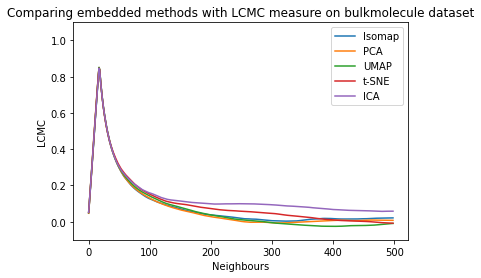

In [38]:
plt.plot(lcmc_isomap, label = 'Isomap')
plt.plot(lcmc_pca, label = 'PCA')
plt.plot(lcmc_UMAP, label = 'UMAP')
plt.plot(lcmc_tsne, label = 't-SNE')
plt.plot(lcmc_ica, label = 'ICA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with LCMC measure on bulkmolecule dataset')
plt.ylabel('LCMC')
plt.xlabel('Neighbours')

Text(0.5, 0, 'Neighbours')

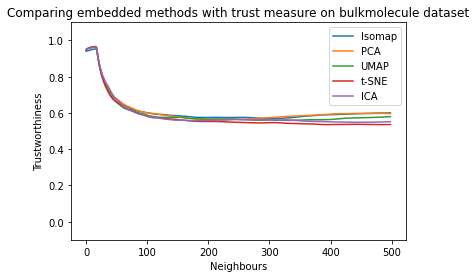

In [39]:
plt.plot(trust_isomap, label = 'Isomap')
plt.plot(trust_pca, label = 'PCA')
plt.plot(trust_UMAP, label = 'UMAP')
plt.plot(trust_tsne, label = 't-SNE')
plt.plot(trust_ica, label = 'ICA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with trust measure on bulkmolecule dataset')
plt.ylabel('Trustworthiness')
plt.xlabel('Neighbours')

Text(0.5, 0, 'Neighbours')

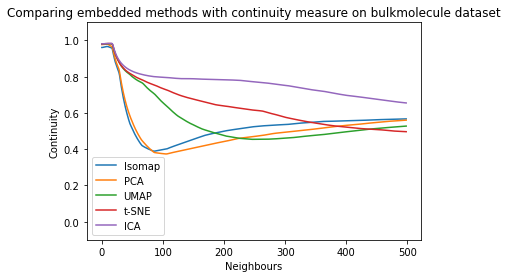

In [40]:
plt.plot(cont_isomap, label = 'Isomap')
plt.plot(cont_pca, label = 'PCA')
plt.plot(cont_UMAP, label = 'UMAP')
plt.plot(cont_tsne, label = 't-SNE')
plt.plot(cont_ica, label = 'ICA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with continuity measure on bulkmolecule dataset')
plt.ylabel('Continuity')
plt.xlabel('Neighbours')

In [41]:
AUC_T1 = np.mean(trust_isomap)
AUC_C1 = np.mean(cont_isomap)
AUC_T2 = np.mean(trust_pca)
AUC_C2 = np.mean(cont_pca)
AUC_T3 = np.mean(trust_UMAP)
AUC_C3 = np.mean(cont_UMAP)
AUC_T4 = np.mean(trust_tsne)
AUC_C4 = np.mean(cont_tsne)
AUC_T5 = np.mean(trust_ica)
AUC_C5 = np.mean(cont_ica)




print("AUC of isomap Trust = ", AUC_T1)
print("AUC of isomap Cont = ", AUC_C1)
print("AUC of PCA Trust = ", AUC_T2)
print("AUC of PCA Cont = ", AUC_C2)
print("AUC of UMAP Trust = ", AUC_T3)
print("AUC of UMAP Cont = ", AUC_C3)
print("AUC of t-SNE Trust = ", AUC_T4)
print("AUC of t-SNE Cont = ", AUC_C4)
print("AUC of ICA Trust = ", AUC_T5)
print("AUC of ICA Cont = ", AUC_C5)

AUC of isomap Trust =  0.6129238765655407
AUC of isomap Cont =  0.5394918478277827
AUC of PCA Trust =  0.611853369576745
AUC of PCA Cont =  0.5129696566874369
AUC of UMAP Trust =  0.5992769429168345
AUC of UMAP Cont =  0.5632202855111524
AUC of t-SNE Trust =  0.5824355261359812
AUC of t-SNE Cont =  0.6373974838647399
AUC of ICA Trust =  0.59242411513393
AUC of ICA Cont =  0.765004054006892


In [42]:
m = len(Q1)
QNN1 = np.zeros(m)
for k in range(m):    
        QNN1[k] = np.sum(Q1[:k+1,:k+1])/((k+1) * m)
        
Plot_QNN1 = QNN1[range(1,101)]

m = len(Q2)
QNN2 = np.zeros(m)
for k in range(m):    
        QNN2[k] = np.sum(Q2[:k+1,:k+1])/((k+1) * m)
       
Plot_QNN2 = QNN2[range(1,101)]

m = len(Q3)
QNN3 = np.zeros(m)
for k in range(m):    
        QNN3[k] = np.sum(Q3[:k+1,:k+1])/((k+1) * m)
       
Plot_QNN3 = QNN3[range(1,101)]

m = len(Q4)
QNN4 = np.zeros(m)
for k in range(m):    
        QNN4[k] = np.sum(Q4[:k+1,:k+1])/((k+1) * m)
       
Plot_QNN4 = QNN4[range(1,101)]

m = len(Q5)
QNN5 = np.zeros(m)
for k in range(m):    
        QNN5[k] = np.sum(Q5[:k+1,:k+1])/((k+1) * m)
       
Plot_QNN5 = QNN5[range(1,101)]

Text(0.5, 0, 'Neighbours')

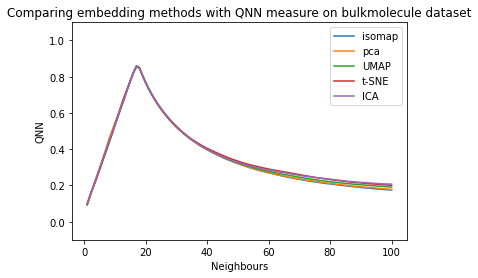

In [43]:
plt.plot(list(range(1, len(Plot_QNN1)+1)), Plot_QNN1, label = 'isomap')
plt.plot(list(range(1, len(Plot_QNN2)+1)), Plot_QNN2, label = 'pca')
plt.plot(list(range(1, len(Plot_QNN3)+1)), Plot_QNN3, label = 'UMAP')
plt.plot(list(range(1, len(Plot_QNN4)+1)), Plot_QNN4, label = 't-SNE')
plt.plot(list(range(1, len(Plot_QNN5)+1)), Plot_QNN5, label = 'ICA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedding methods with QNN measure on bulkmolecule dataset')
plt.ylabel('QNN')
plt.xlabel('Neighbours')

In [44]:
AUC1 = np.mean(QNN1)
AUC2 = np.mean(QNN2)
AUC3 = np.mean(QNN3)
AUC4 = np.mean(QNN4)
AUC5 = np.mean(QNN5)

print("AUC of isomap is", AUC1)
print("AUC of pca is", AUC2)
print("AUC of UMAP is", AUC3)
print("AUC of t-SNE is", AUC4)
print("AUC of ICA is", AUC5)



AUC of isomap is 0.5355437747177035
AUC of pca is 0.5458560180877058
AUC of UMAP is 0.5326521137195959
AUC of t-SNE is 0.5201924481053979
AUC of ICA is 0.5382485662932214


In [45]:
kmax1 = np.argmax(lcmc_isomap)
kmax2 = np.argmax(lcmc_pca)
kmax3 = np.argmax(lcmc_UMAP)
kmax4 = np.argmax(lcmc_tsne)
kmax5 = np.argmax(lcmc_ica)

print("kmax of isomap is", kmax1)
print("kmax of pca is", kmax2)
print("kmax of UMAP is", kmax3)
print("kmax of t-SNE is", kmax4)
print("kmax of ICA is", kmax5)

kmax of isomap is 17
kmax of pca is 17
kmax of UMAP is 17
kmax of t-SNE is 17
kmax of ICA is 17


In [46]:
Qlocal1 = np.sum(QNN1[:kmax1+1])/(kmax1 + 1) 
Qglobal1 = np.sum(QNN1[kmax1:-1])/(m - kmax1 -1)

Qlocal2 = np.sum(QNN2[:kmax2+1])/(kmax2 + 1) 
Qglobal2 = np.sum(QNN2[kmax2:-1])/(m - kmax2 -1)

Qlocal3 = np.sum(QNN3[:kmax3+1])/(kmax3 + 1) 
Qglobal3 = np.sum(QNN3[kmax3:-1])/(m - kmax3 -1)

Qlocal4 = np.sum(QNN4[:kmax4+1])/(kmax4 + 1) 
Qglobal4 = np.sum(QNN4[kmax4:-1])/(m - kmax4 -1)

Qlocal5 = np.sum(QNN5[:kmax5+1])/(kmax5 + 1) 
Qglobal5 = np.sum(QNN5[kmax5:-1])/(m - kmax5 -1)

print("Qlocal of isomap =", Qlocal1)
print("Qglobal of isomap =", Qglobal1)

print("Qlocal of pca =", Qlocal2)
print("Qglobal of pca =", Qglobal2)

print("Qlocal of UMAP =", Qlocal3)
print("Qglobal of UMAP =", Qglobal3)

print("Qlocal of t-SNE =", Qlocal4)
print("Qglobal of t-SNE =", Qglobal4)

print("Qlocal of ICA =", Qlocal5)
print("Qglobal of ICA =", Qglobal5)

Qlocal of isomap = 0.4593373412431473
Qglobal of isomap = 0.5361419458274961
Qlocal of pca = 0.466254560045311
Qglobal of pca = 0.5464859225718872
Qlocal of UMAP = 0.4571884862855564
Qglobal of UMAP = 0.533246421862983
Qlocal of t-SNE = 0.4596898797015009
Qglobal of t-SNE = 0.5206533752324154
Qlocal of ICA = 0.45913693336580447
Qglobal of ICA = 0.5388725210298381


### Quality metrics in 2D - Laplacian Eigenmap

In [47]:
start = time.perf_counter()
# Generate Spec embedding
K = 2
spec = SpectralEmbedding(n_components=K)
spec_embedding = spec.fit_transform(standardised_data)

end = time.perf_counter()
print(f"Processed the Spectral algorithm in {start-end:0.4f} seconds")

Processed the Spectral algorithm in -1.0936 seconds


In [48]:
import coranking
from coranking.metrics import trustworthiness, continuity, LCMC

Q1 = coranking.coranking_matrix(standardised_data, spec_embedding)
trust_pca = trustworthiness(Q1, min_k=1, max_k=500)
cont_pca = continuity(Q1, min_k=1, max_k=500)
lcmc_pca = LCMC(Q1, min_k=1, max_k=500)

Text(0.5, 0, 'Neighbours')

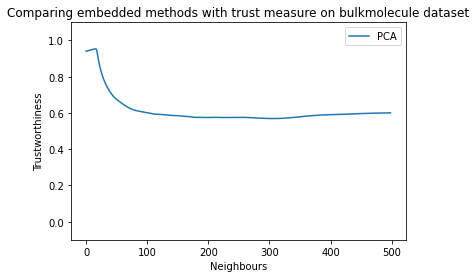

In [49]:
plt.plot(trust_isomap, label = 'PCA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with trust measure on bulkmolecule dataset')
plt.ylabel('Trustworthiness')
plt.xlabel('Neighbours')

Text(0.5, 0, 'Neighbours')

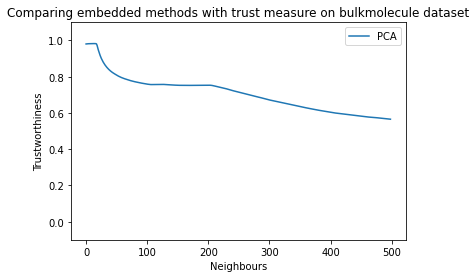

In [50]:
plt.plot(cont_pca, label = 'PCA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with trust measure on bulkmolecule dataset')
plt.ylabel('Trustworthiness')
plt.xlabel('Neighbours')

Text(0.5, 0, 'Neighbours')

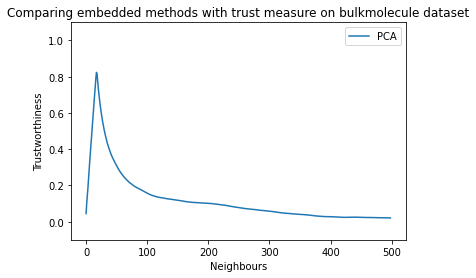

In [51]:
plt.plot(lcmc_pca, label = 'PCA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with trust measure on bulkmolecule dataset')
plt.ylabel('Trustworthiness')
plt.xlabel('Neighbours')

In [52]:
AUC_T1 = np.mean(trust_pca)
AUC_C1 = np.mean(cont_pca)

print("AUC of PCA Trust = ", AUC_T1)
print("AUC of PCA Cont = ", AUC_C1)

AUC of PCA Trust =  0.5872401411460667
AUC of PCA Cont =  0.7069228710845424


In [53]:
m = len(Q1)
QNN1 = np.zeros(m)
for k in range(m):    
        QNN1[k] = np.sum(Q1[:k+1,:k+1])/((k+1) * m)
        
Plot_QNN1 = QNN1[range(1,101)]

In [54]:
AUC1 = np.mean(QNN1)

print("AUC of PCA is", AUC1)

AUC of PCA is 0.5326981793924936


In [55]:
kmax1 = np.argmax(lcmc_pca)

print("kmax of pca is", kmax1)

kmax of pca is 17


In [56]:
Qlocal1 = np.sum(QNN1[:kmax1+1])/(kmax1 + 1) 
Qglobal1 = np.sum(QNN1[kmax1:-1])/(m - kmax1 -1)

print("Qlocal of PCA =", Qlocal1)
print("Qglobal of PCA =", Qglobal1)

Qlocal of PCA = 0.45026507985933534
Qglobal of PCA = 0.5333399471395321


In [58]:
Q1 = coranking.coranking_matrix(standardised_data, pca_embedding)
Q2 = coranking.coranking_matrix(standardised_data, tsne_embedding4)
Q3 = coranking.coranking_matrix(standardised_data, isomap_embedding5)
Q4 = coranking.coranking_matrix(standardised_data, UMAP_embedding18)
Q5 = coranking.coranking_matrix(standardised_data, spec_embedding)

Text(0.5, 1.0, 'Isomap projection')

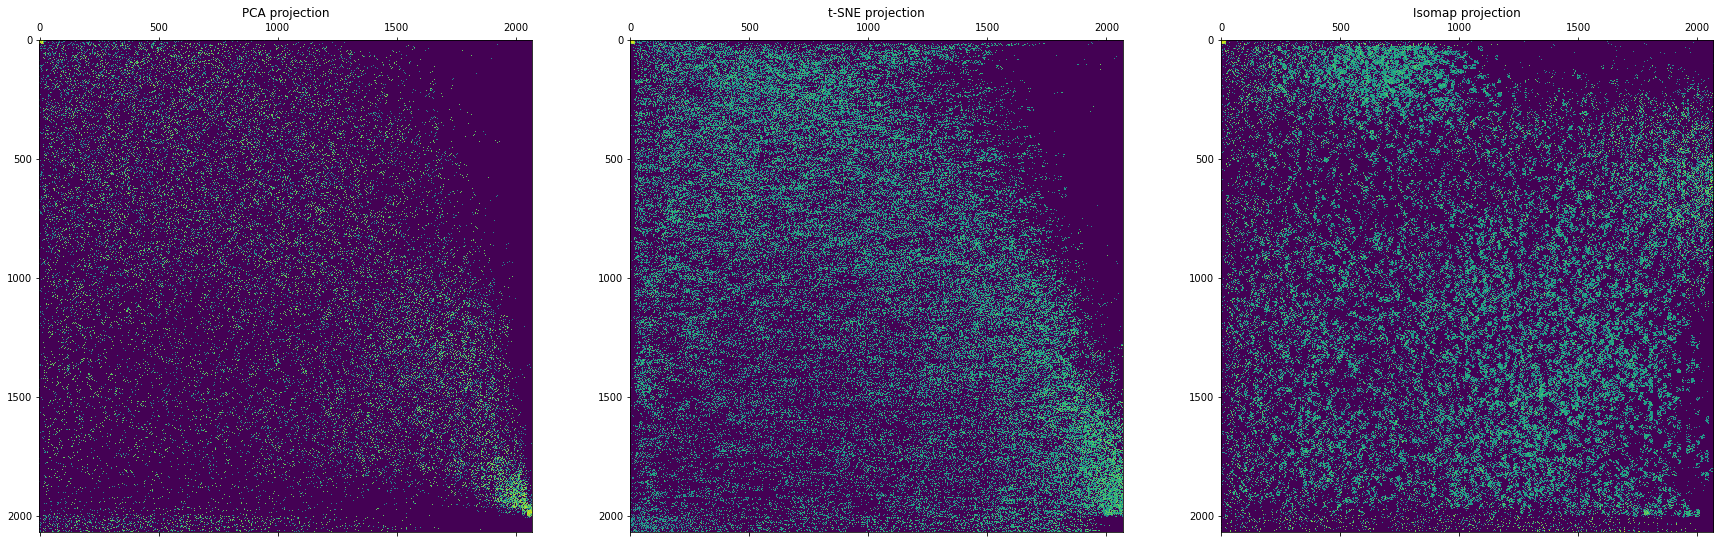

In [59]:
fig, axs = plt.subplots(figsize=(30,10), ncols = 3)
axs[0].matshow(np.log(Q1+1e-2))
axs[0].set_title('PCA projection')
axs[1].matshow(np.log(Q2+1e-2))
axs[1].set_title('t-SNE projection')
axs[2].matshow(np.log(Q3+1e-2))
axs[2].set_title('Isomap projection')

Text(0.5, 1.0, 'Laplacian projection')

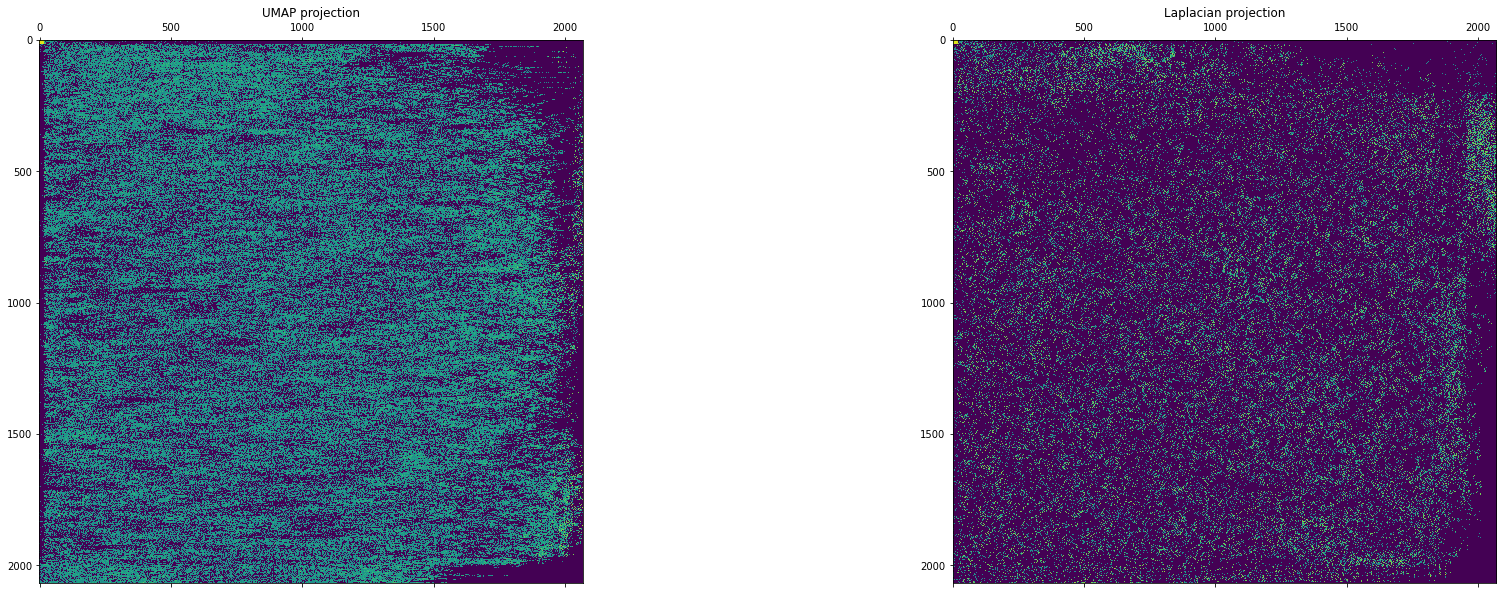

In [60]:
fig, axs = plt.subplots(figsize=(30,10), ncols = 2)
axs[0].matshow(np.log(Q4+1e-2))
axs[0].set_title('UMAP projection')
axs[1].matshow(np.log(Q5+1e-2))
axs[1].set_title('Laplacian projection')